#Principal Componenent Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# Download and load iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length','sepal width','petal length','petal width','target']
df = pd.read_csv(url, names=names)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Standardize data to 0 mean and 1 variance
features = names[:-1]
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
print(x[0])
print(x[1])

[-0.90068117  1.03205722 -1.3412724  -1.31297673]
[-1.14301691 -0.1249576  -1.3412724  -1.31297673]


In [5]:
# Perform PCA using two componenents (k=2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
# Let's look at our components
print(pca.components_)

# Let's print the explained variance by each componenent using np.around to round to two decimal places
print(np.around(pca.explained_variance_ratio_*100, 2))

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
[72.77 23.03]


[72.8 95.8]


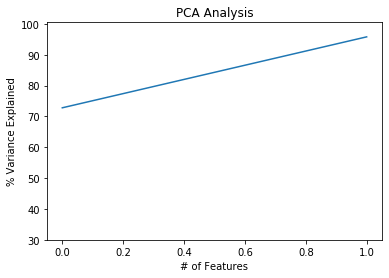

In [7]:
#cumulative sum of variance explained with [n] features

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var) 
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [0]:
# Merge or concatenate our PCA dataset with our target column
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

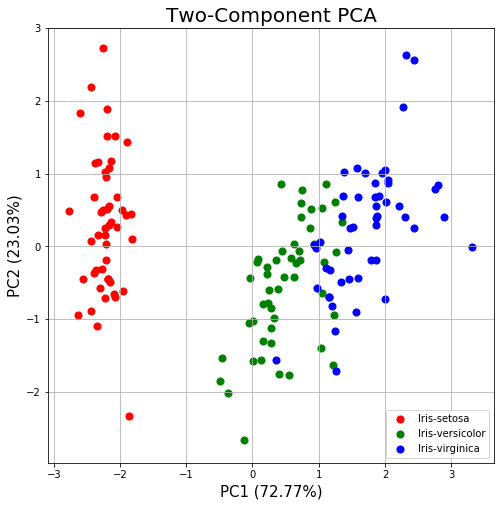

In [9]:
# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
explained = np.around(pca.explained_variance_ratio_*100, 2)
ax.set_xlabel('PC1 ({}%)'.format(explained[0]), fontsize = 15)
ax.set_ylabel('PC2 ({}%)'.format(explained[1]), fontsize = 15)
ax.set_title('Two-Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()